In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.manifold import Isomap
plt.rcParams['figure.figsize'] = [7, 5]
%config InlineBackend.figure_format='retina'

In [2]:
digits = datasets.load_digits()
print(digits.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [3]:
embedding = Isomap(n_neighbors=5,n_components=2)
digits_reduced = embedding.fit_transform(digits.data)

/home/alice/.local/lib/python3.10/site-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/alice/.local/lib/python3.10/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


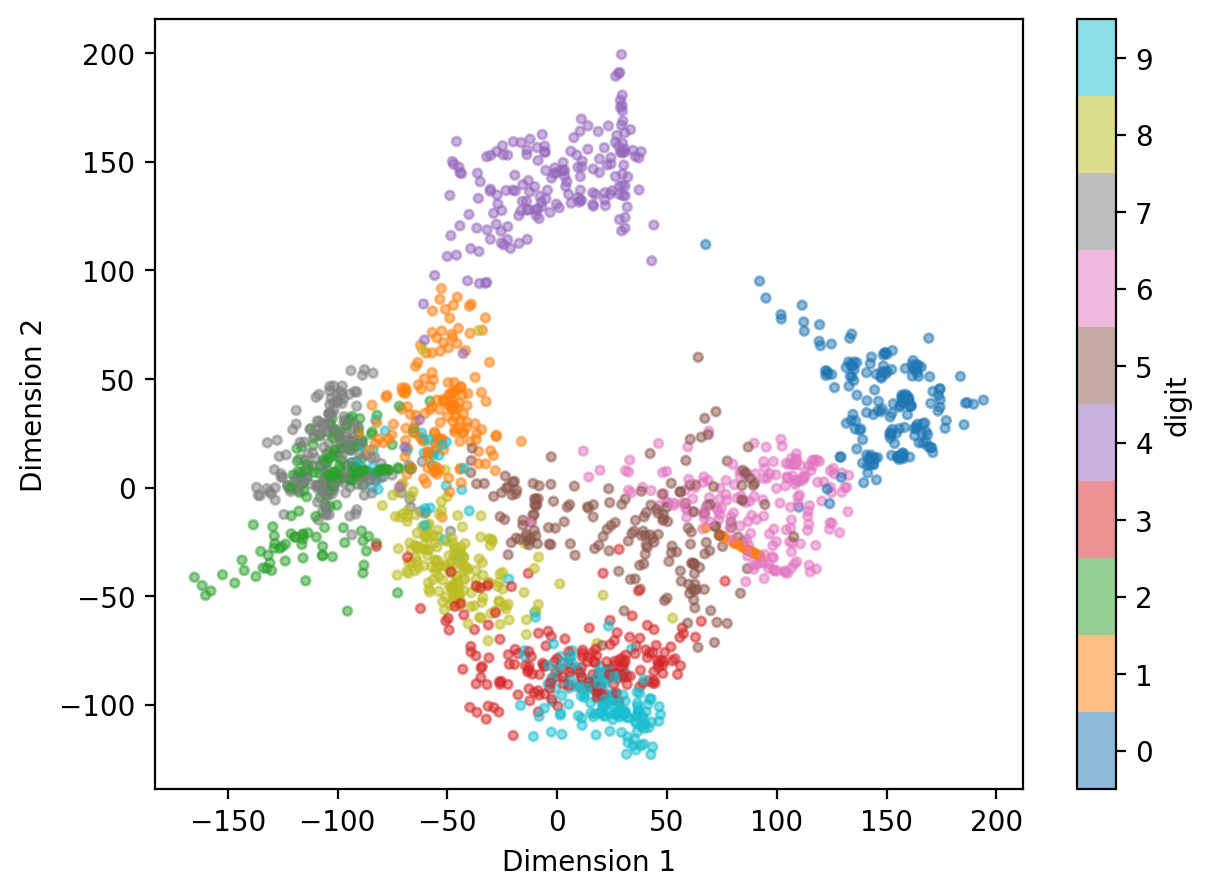

In [4]:
plt.scatter(digits_reduced[:,0], digits_reduced[:,1], s=10, c=digits.target, cmap='tab10', edgecolor=None, alpha=0.5, vmin=-0.5, vmax=9.5)
plt.colorbar(ticks=range(10), label='digit')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

In [5]:
np.random.seed(0)

In [6]:
from sklearn.model_selection import train_test_split
d_train, d_test, target_train, target_test, i_train, i_test = train_test_split(digits.data, digits.target, digits.images, test_size=0.2)
print('Total set has shape : ', digits.data.shape)
print('Train set has shape :', d_train.shape)
print('Test set has shape :', d_test.shape)

Total set has shape :  (1797, 64)
Train set has shape : (1437, 64)
Test set has shape : (360, 64)


Training set:
Confusion matrix: 
 [[151   0   0   0   0   0   0   0   0   0]
 [  0 147   0   0   0   0   0   0   0   0]
 [  0   0 141   0   0   0   0   0   0   0]
 [  0   0   0 154   0   0   0   0   0   0]
 [  0   0   0   0 151   0   0   0   0   0]
 [  0   0   0   0   0 142   0   0   0   0]
 [  0   0   0   0   0   0 137   0   0   0]
 [  0   0   0   0   0   0   0 140   0   0]
 [  0   0   0   0   0   0   0   0 135   0]
 [  0   0   0   0   0   0   0   0   0 139]]
Accuracy score:  1.0


Test set: 
 Confusion matrix: 
 [[27  0  0  0  0  0  0  0  0  0]
 [ 0 32  0  0  0  0  0  0  1  2]
 [ 0  0 35  1  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0]
 [ 0  0  0  0 29  0  0  1  0  0]
 [ 0  0  0  0  0 38  0  0  0  2]
 [ 0  1  0  0  0  0 43  0  0  0]
 [ 0  0  0  0  1  0  0 38  0  0]
 [ 0  2  1  0  0  0  0  0 36  0]
 [ 0  0  0  0  0  1  0  0  0 40]]
Accuracy score:  0.9638888888888889


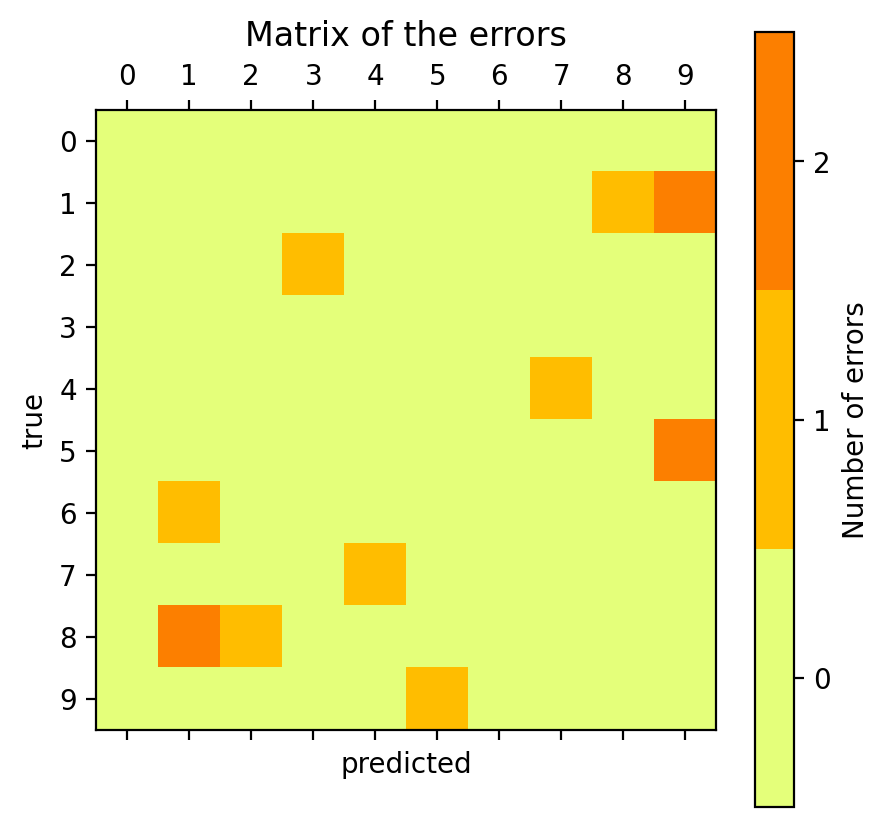

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

model = LogisticRegression(max_iter=1000, solver='sag')
clf = model.fit(d_train, target_train)

target_train_pred = clf.predict(d_train)
acc_train=accuracy_score(target_train, target_train_pred)
print('Training set:')
print('Confusion matrix: \n', confusion_matrix(target_train, target_train_pred))
print('Accuracy score: ', acc_train)
print('\n')

target_test_pred = clf.predict(d_test)
acc_test=accuracy_score(target_test, target_test_pred)
print('Test set: \n Confusion matrix: \n', confusion_matrix(target_test, target_test_pred))
print('Accuracy score: ', acc_test)

conf_mat=confusion_matrix(target_test, target_test_pred)
err_mat=conf_mat - np.diag(np.diag(conf_mat))
cmap=plt.get_cmap('Wistia', np.max(err_mat)+1)
plt.matshow(err_mat, cmap=cmap, vmin=-0.5, vmax=np.max(err_mat)+0.5)
plt.title('Matrix of the errors')
plt.colorbar(ticks=np.arange(np.max(err_mat)+1), label='Number of errors')
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
plt.xlabel('predicted')
plt.ylabel('true')
plt.show()

When the model predicts the train set, the accuracy score is 1 because the model has been trained on this set, so it can't go wrong. When the model predicts the test set, some digits are mismatched. For example in this case '8' is identified twice as '1' and once as '2', while '1' is identified once as '8' and twice as '9'. Also the digits '5' and '9' are being confused.

There are the first 10 digits mistaken: 


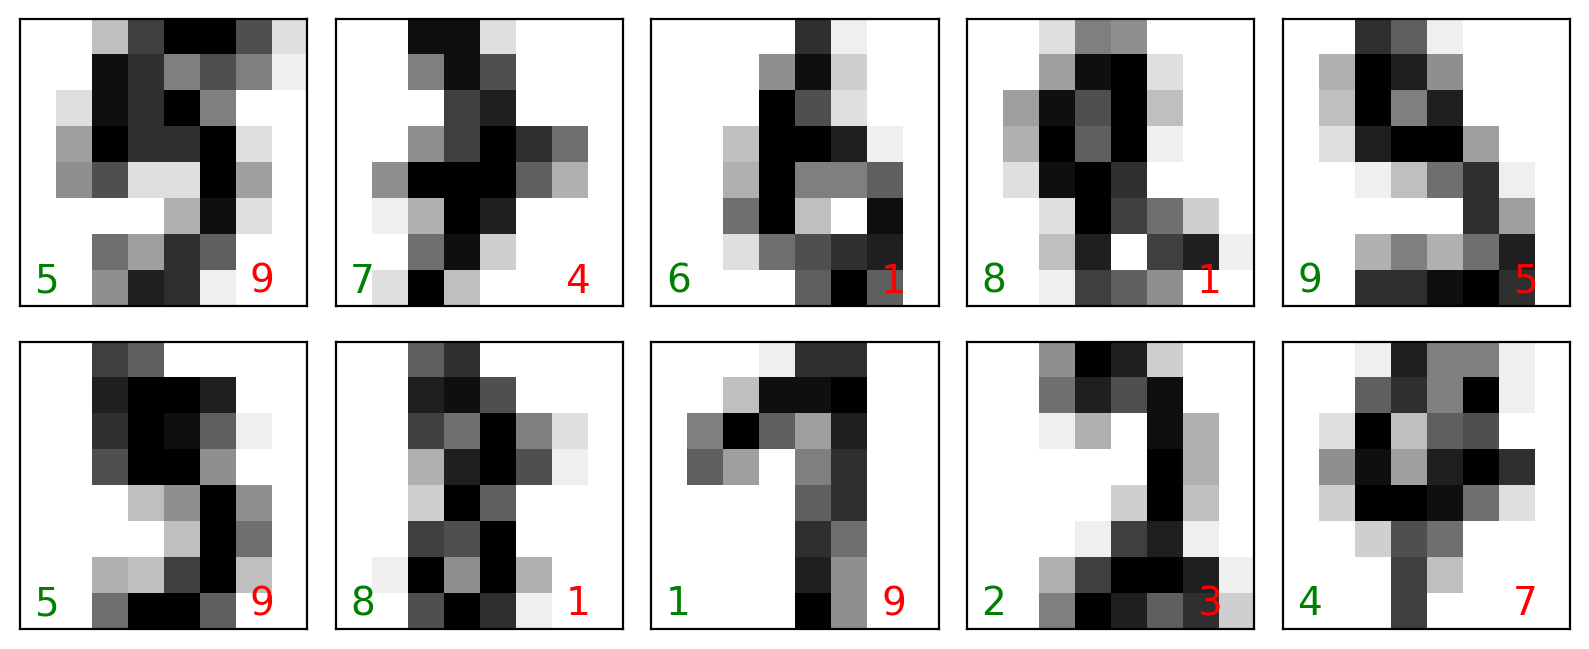

In [8]:
fig, axes = plt.subplots(2,5, figsize=(10, 4))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

idx = np.argwhere(target_test!=target_test_pred).squeeze()
print('There are the first 10 digits mistaken: ')
for i, ax in zip(idx[:10],axes.flat):
    
    ax.imshow((i_test[i]), cmap='binary')
    ax.text(0.05, 0.05, str(target_test[i]),transform=ax.transAxes, color='green', fontsize=14)
    ax.text(0.8, 0.05, str(target_test_pred[i]), transform=ax.transAxes, color='red', fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])

## My accuracy vs Machine Learning accurcay

Prediction with Logistic_Regression: 
 Confusion matrix: 
 [[6 0 0 0 0 0 0 0 0 0]
 [0 7 0 0 0 0 0 0 0 0]
 [0 0 4 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 6 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 0 7 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 5 0]
 [0 0 0 0 0 0 0 0 0 8]]
Accuracy score:  1.0


My prediction: 
 Confusion matrix: 
 [[6 0 0 0 0 0 0 0 0 0]
 [0 4 0 0 0 0 1 0 1 1]
 [0 0 4 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0]
 [1 0 0 0 5 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0]
 [0 0 0 0 1 0 6 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0 4 0]
 [0 0 0 0 0 0 0 1 0 7]]
Accuracy score:  0.8571428571428571


Lower left : True digit
Lower right : ML prediction
Upper right : My prediction


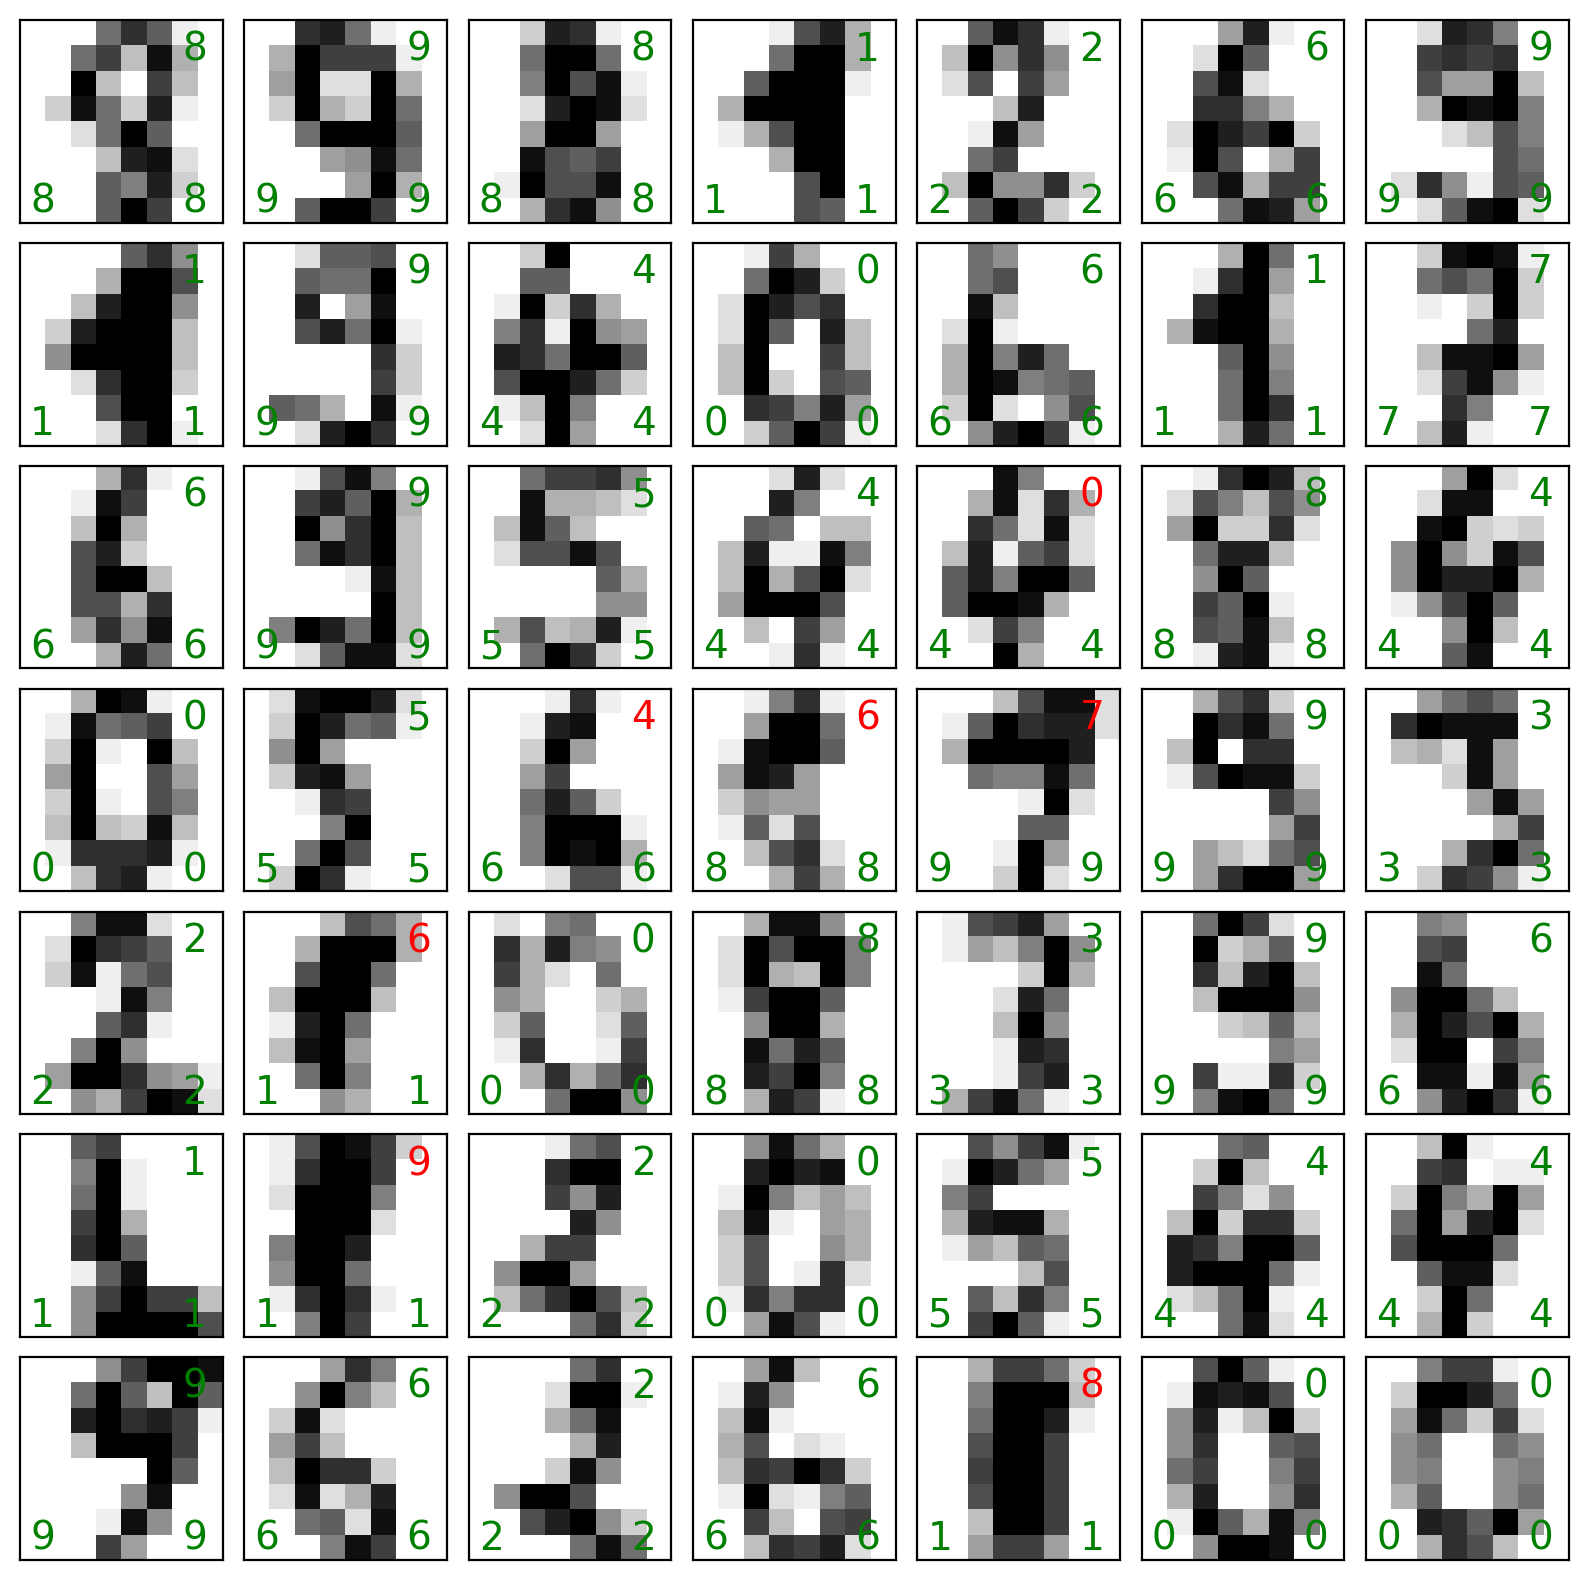

In [9]:
fig, axes = plt.subplots(7,7, figsize=(10, 10))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

np.random.seed(4321)
mychoices = np.random.choice(digits.images.shape[0],49)
target_true = digits.target[mychoices]
target_pred = clf.predict(digits.data[mychoices])
my_target=[8,9,8,1,2,6,9,1,9,4,0,6,1,7,6,9,5,4,0,8,4,0,5,4,6,7,9,3,2,6,0,8,3,9,6,1,9,2,0,
           5,4,4,9,6,2,6,8,0,0]

for i, ax in enumerate(axes.flat):
    ax.imshow((digits.images[mychoices[i]]), cmap='binary')
    
    ax.text(0.05, 0.05, str(target_true[i]),transform=ax.transAxes, color='green', fontsize=14)
    
    c1='green'
    if(target_true[i]!=target_pred[i]):
        c1 = 'red'
    
    c2='green'
    if(target_true[i]!=my_target[i]):
        c2 = 'red'
    
    ax.text(0.8, 0.05, str(target_pred[i]), transform=ax.transAxes, color=c1, fontsize=14)
    ax.text(0.8, 0.8, str(my_target[i]), transform=ax.transAxes, color=c2, fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])
    

acc_test=accuracy_score(target_true, target_pred)
print('Prediction with Logistic_Regression: \n Confusion matrix: \n', confusion_matrix(target_true, target_pred))
print('Accuracy score: ', acc_test)
print('\n')

acc_test=accuracy_score(target_true[:49], my_target)
print('My prediction: \n Confusion matrix: \n', confusion_matrix(target_true[:49], my_target))
print('Accuracy score: ', acc_test)
print('\n')

print('Lower left : True digit')
print('Lower right : ML prediction')
print('Upper right : My prediction')